### 1. Import Libraries (Gerekli Kutuphaneleri Iceri Aktar)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 
import os
from pathlib import Path 
import sys

# from src.download_data import load_dataset, ensure_raw_data

In [4]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.download_data import load_dataset, ensure_raw_data

In [6]:
try:
    fraud_df = load_dataset(dataset_path= "D:/Datasets/creditcard.csv")
    print("Ilk Bes Satir Gosteriliyor...\n")
    print(fraud_df.head())
except FileNotFoundError:
    raise FileNotFoundError("Dosya Bulunamadi")

except Exception as err:
    raise Exception(f"Beklenmeyen Bir Hata Olustu: {err}")

Klasor Olusturuldu
Fraud DataFrame'i Basarili Bir Sekilde Yuklendi.
Ilk Bes Satir Gosteriliyor...

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0

### 2. Describe() ve Info() Methodlarini Kullan:

In [7]:
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 3. Eksik Deger Var mi Incele

In [13]:
null_values = fraud_df.isnull().sum()
print(null_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### 4. Hedef Degiskenlerin Dagilimini Incele


In [18]:
target_value = fraud_df['Class']
target_value.value_counts(normalize= True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [41]:
def show_target_pie(dataframe, target_value, plot = False):
    df = dataframe.copy()
    if target_value in df.columns:
        target_vc = df[target_value].value_counts()
        target_labels = target_vc.index
        target_values = target_vc.values
        if plot:
            plt.figure(figsize= (10, 6))
            plt.pie(x = target_values, labels = target_labels, autopct= '%1.1f%%' , startangle= 140, colors=sns.color_palette("RdYlGn_r"))
            plt.title(f"{target_value} Sutununun Dagilimi")
            plt.tight_layout()
            plt.show()
        else:
            print("Lutfen plot parametresini True yapiniz")
    else:
        print(f"{target_value} Sutunu Veri Setinde Bulunamadi")

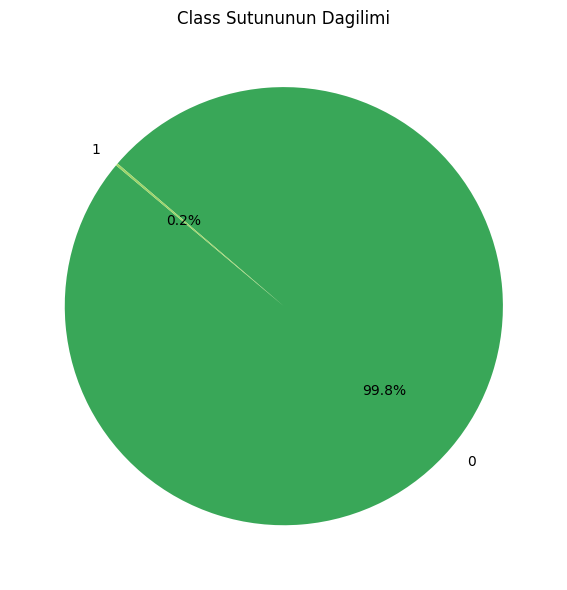

In [42]:
show_target_pie(dataframe= fraud_df, target_value= "Class", plot= True)

In [46]:
min_amount = fraud_df['Amount'].min()
max_amount = fraud_df['Amount'].max()
avg_amount = fraud_df['Amount'].mean()
median_amount = fraud_df['Amount'].median()
std_amount = fraud_df['Amount'].std()
mod_amount = fraud_df['Amount'].mode()[0]

print(f"Minimum Islem Tutari: {min_amount}")
print(f"Maksimum Islem Tutari: {max_amount}")
print(f"Ortalama Islem Tutari: {avg_amount}")
print(f"Ikinci Ceyreklik Degeri: {median_amount}")
print(f"Islem Tutarlari Standart Sapmasi: {std_amount}")
print(f"En Cok Tekrarlanan Islem Tutari: {mod_amount}")


Minimum Islem Tutari: 0.0
Maksimum Islem Tutari: 25691.16
Ortalama Islem Tutari: 88.34961925093134
Ikinci Ceyreklik Degeri: 22.0
Islem Tutarlari Standart Sapmasi: 250.12010924018855
En Cok Tekrarlanan Islem Tutari: 1.0


### 5. Correlation Matrix - Heatmap (Korelasyon Matrisi ve Isı Haritasi)

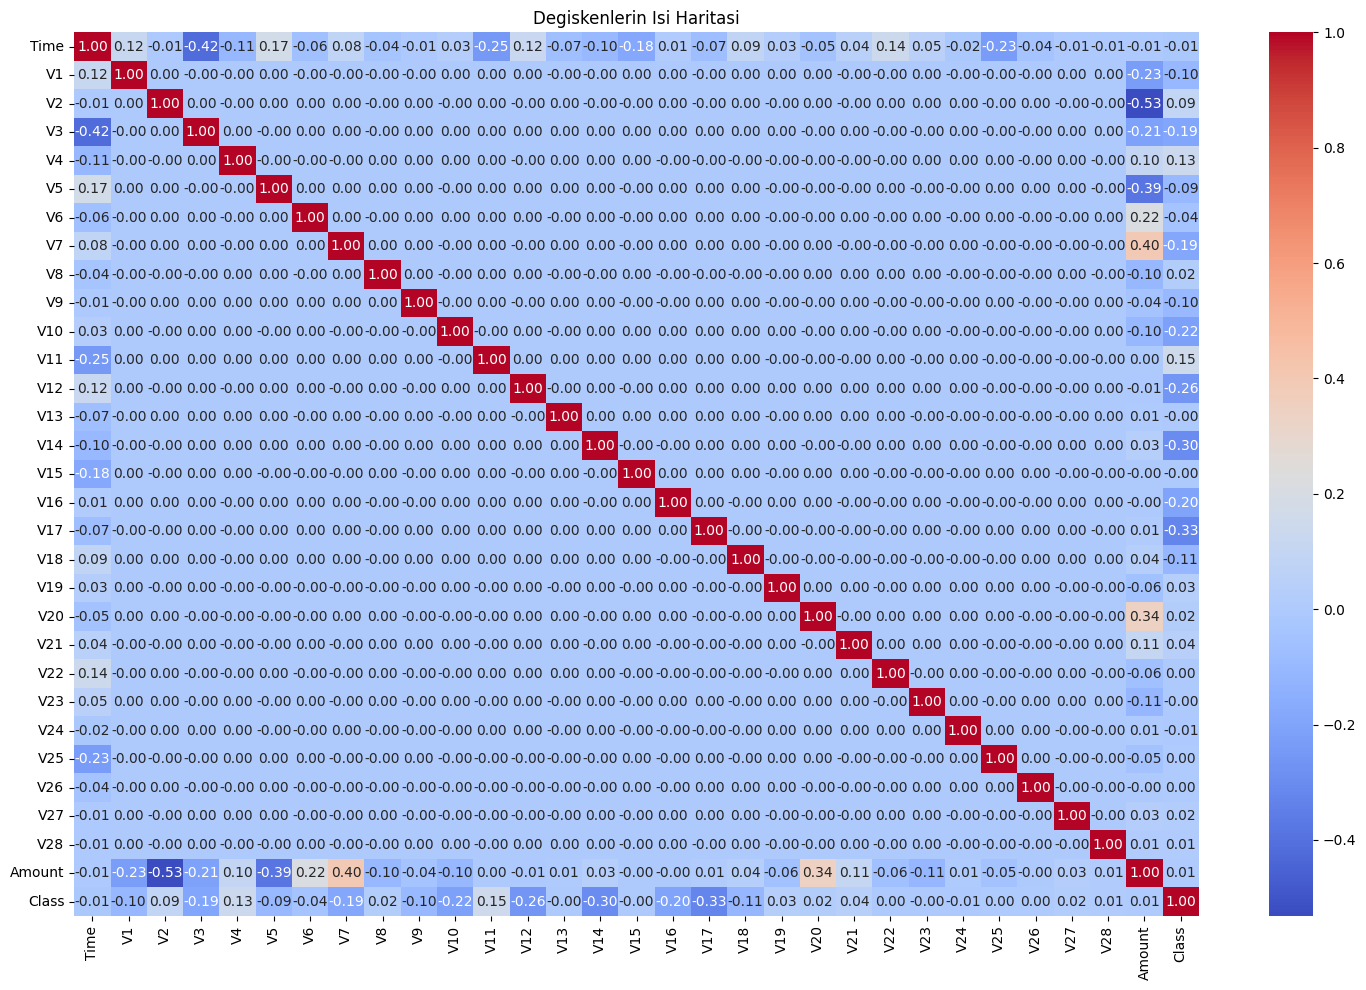

In [49]:
correlations = fraud_df.corr(numeric_only= True)
plt.figure(figsize= (15, 10))
sns.heatmap(data = correlations
            ,annot= True
            ,cmap ="coolwarm"
            ,fmt = ".2f")
plt.title("Degiskenlerin Isi Haritasi")
plt.tight_layout()
plt.show()

In [54]:
def grab_col_names(dataframe, cat_th = 10, card_th = 20):
    df = dataframe.copy()
    dtypes = df.dtypes
    nunique = df.nunique()
    
    cat_cols = [col for col in df.columns if dtypes[col] == 'object']
    
    num_but_cat = [col for col in df.columns 
                   if dtypes[col] in ['float64', 'int64'] and nunique[col] < cat_th]
    
    cat_but_car = [col for col in df.columns 
                   if dtypes[col] == 'object' and nunique[col] > card_th]
    
    num_cols = [col for col in df.columns 
                if dtypes[col] in ['int64', 'float64'] and col not in num_but_cat]
    
    
    cat_cols = [col for col in (cat_cols + num_but_cat) if col not in cat_but_car]
    
    print(f"Observations (Gozlem Degerleri): {df.shape[0]}")
    
    print(f"Variables (Degiskenler): {df.shape[1]}")
    
    print(f'cat_cols (Kategorik Degiskenler)): {len(cat_cols)}')
    
    print(f'num_cols (Sayisal Degiskenler): {len(num_cols)}')
    
    print(f'cat_but_car (Kategorik Gorunumlu Kardinaller): {len(cat_but_car)}')
    
    print(f'num_but_cat (Sayisal Gorunumlu Kategorikler): {len(num_but_cat)}')
    
    return  cat_cols,num_cols,  cat_but_car 

In [57]:
cat_cols, num_cols, cat_but_car = grab_col_names(fraud_df)


Observations (Gozlem Degerleri): 284807
Variables (Degiskenler): 31
cat_cols (Kategorik Degiskenler)): 1
num_cols (Sayisal Degiskenler): 30
cat_but_car (Kategorik Gorunumlu Kardinaller): 0
num_but_cat (Sayisal Gorunumlu Kategorikler): 1


### 6. Numeriklerin Dagilimi:


In [56]:
def show_num_cols(dataframe, num_cols, plot = False, target_value = "Class"):
    df = dataframe.copy()
    for col in num_cols:
        if col not in df.columns:
            print(f"{col} Sutunu Veri Setinde Bulunmamaktadir")
            continue
        
        if plot:
            plt.figure(figsize = (12, 8))
            sns.histplot(data = df, x = col, bins = 30, kde = True, hue = target_value, palette=["#90CAF9", "#E53935"])
            plt.title(f"{col} Sutununn Histogram Grafigi", fontsize = 14)
            plt.xlabel(f"{col}", fontdict= {
                "size" : 14,
                "weight": "bold",
                "color": "darkgray"
            })
            plt.ylabel("Frekans",fontdict= {
                "size" : 14,
                "weight": "bold",
                "color": "darkgray"
            })
            plt.tight_layout()
            plt.grid(axis = 'y')
            plt.show()
        else:
            print("Lutfen plot parametresini True yapiniz")
            
            
num_cols = fraud_df.select_dtypes(include= ["int64","float64"]).columns
cat_cols = fraud_df.select_dtypes(include= ["object"]).columns
print("Sayisal Degiskenler:\n ",num_cols)
print("Kategorik Degiskenler:\n", cat_cols)


Sayisal Degiskenler:
  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Kategorik Degiskenler:
 Index([], dtype='object')


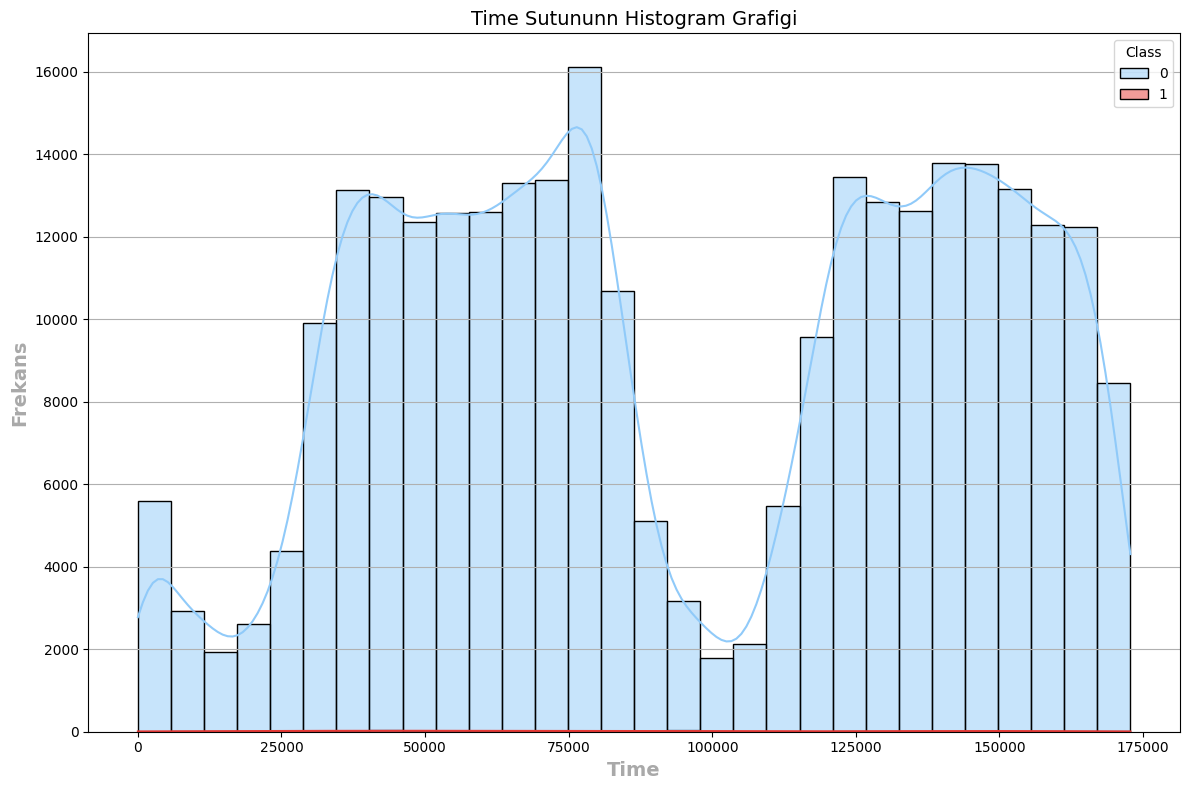

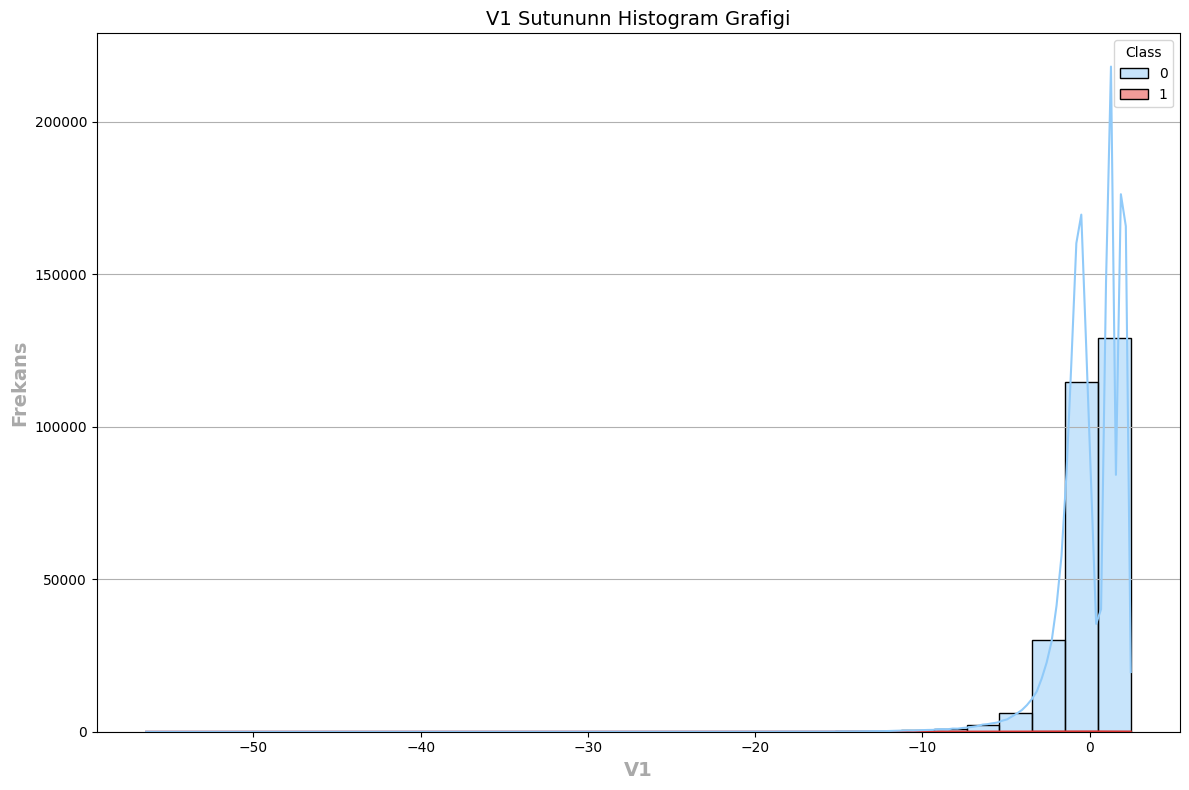

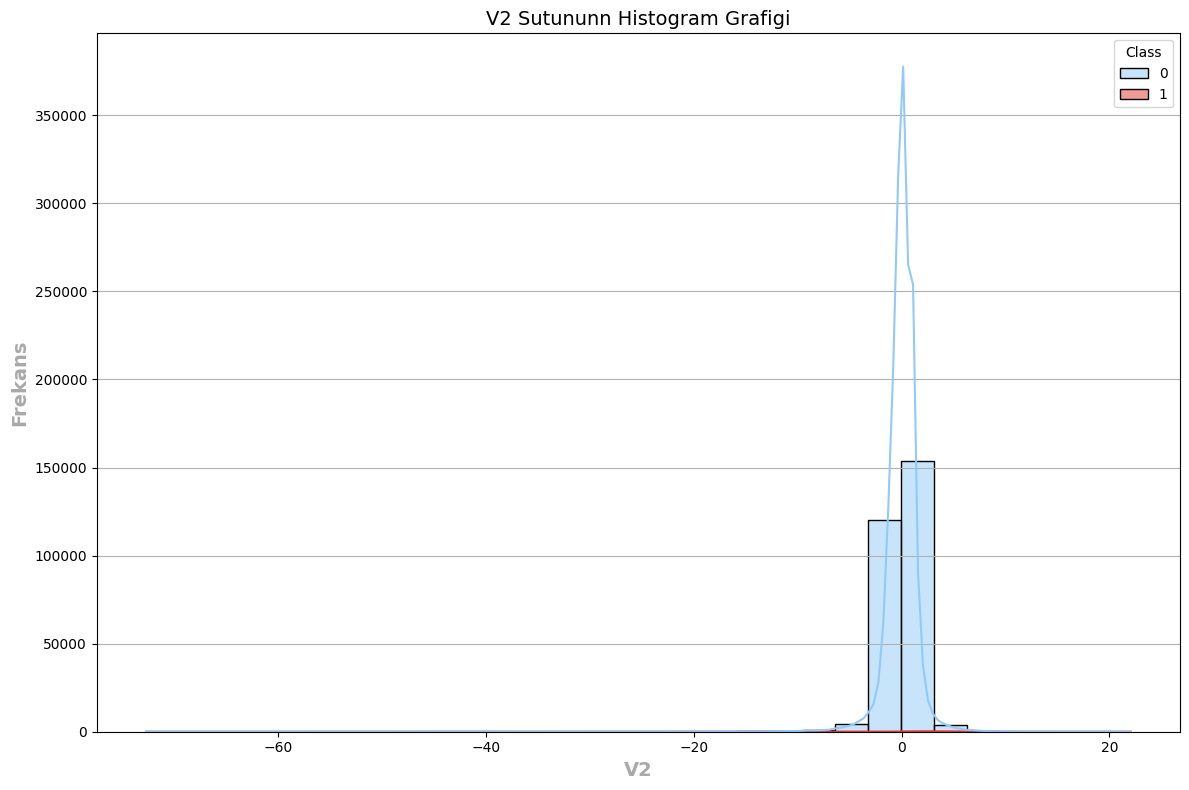

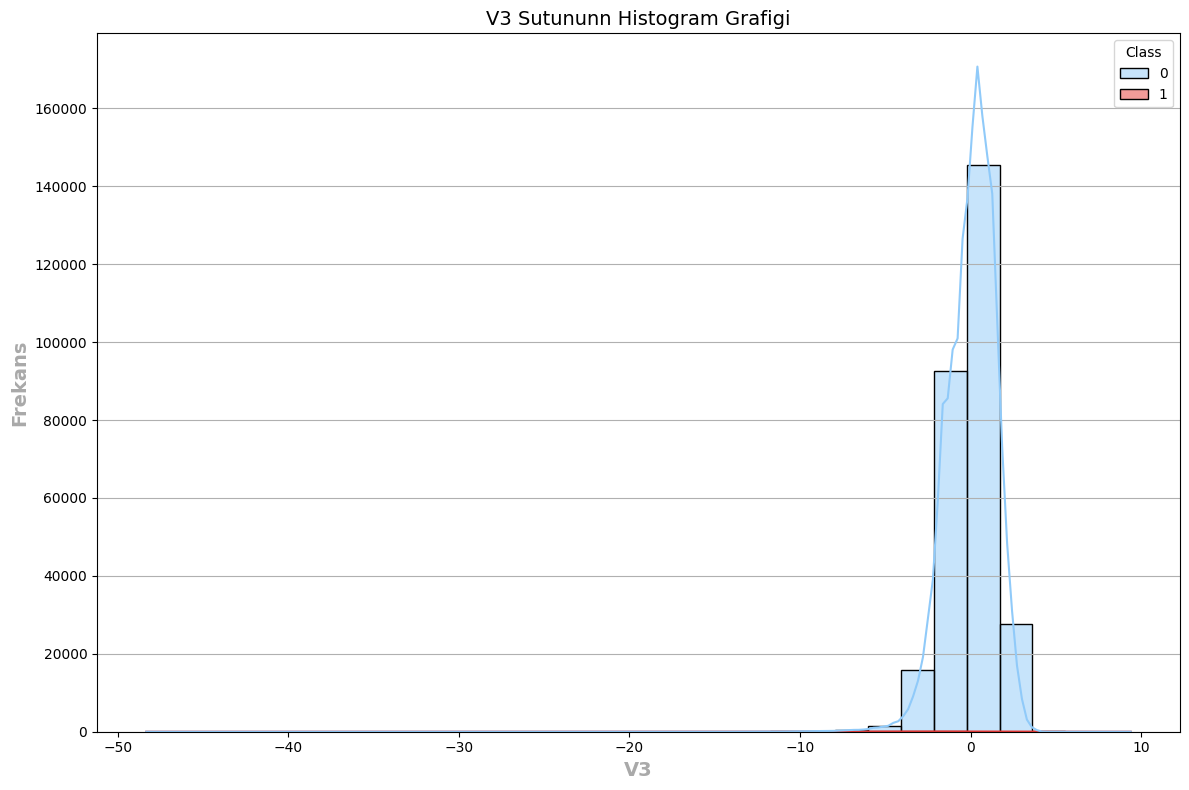

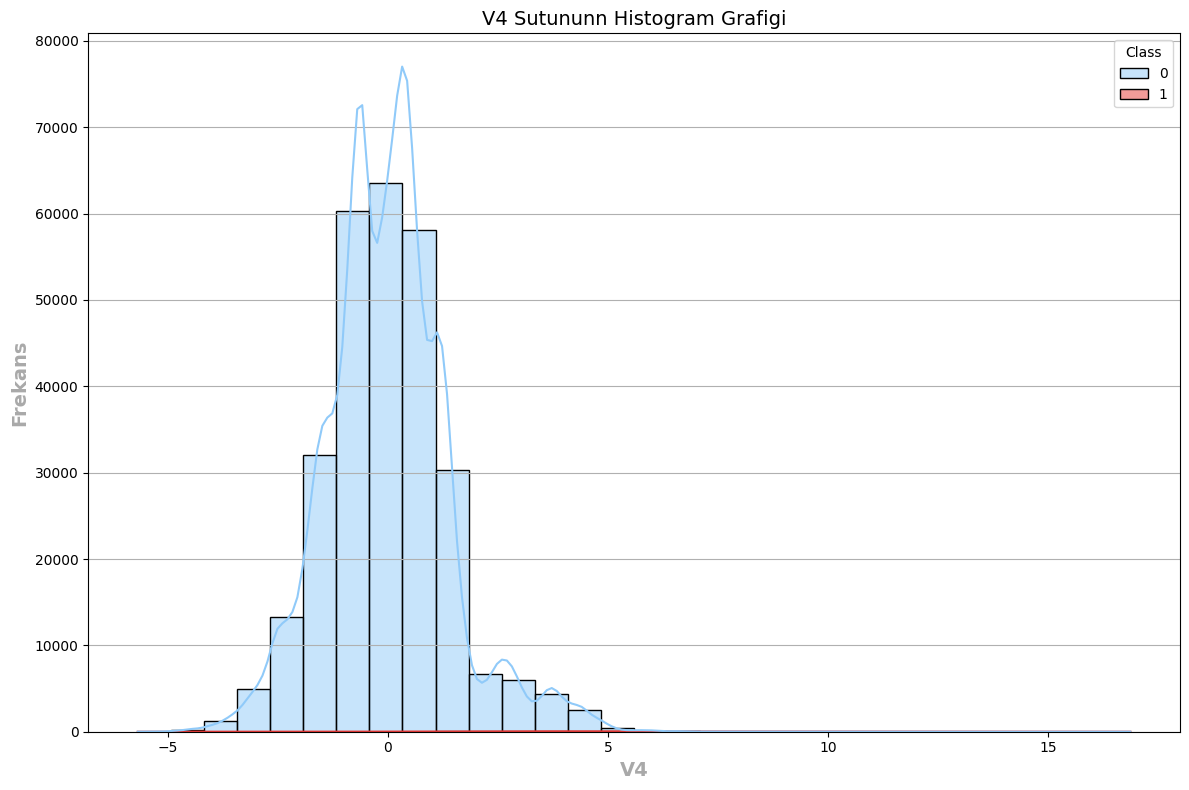

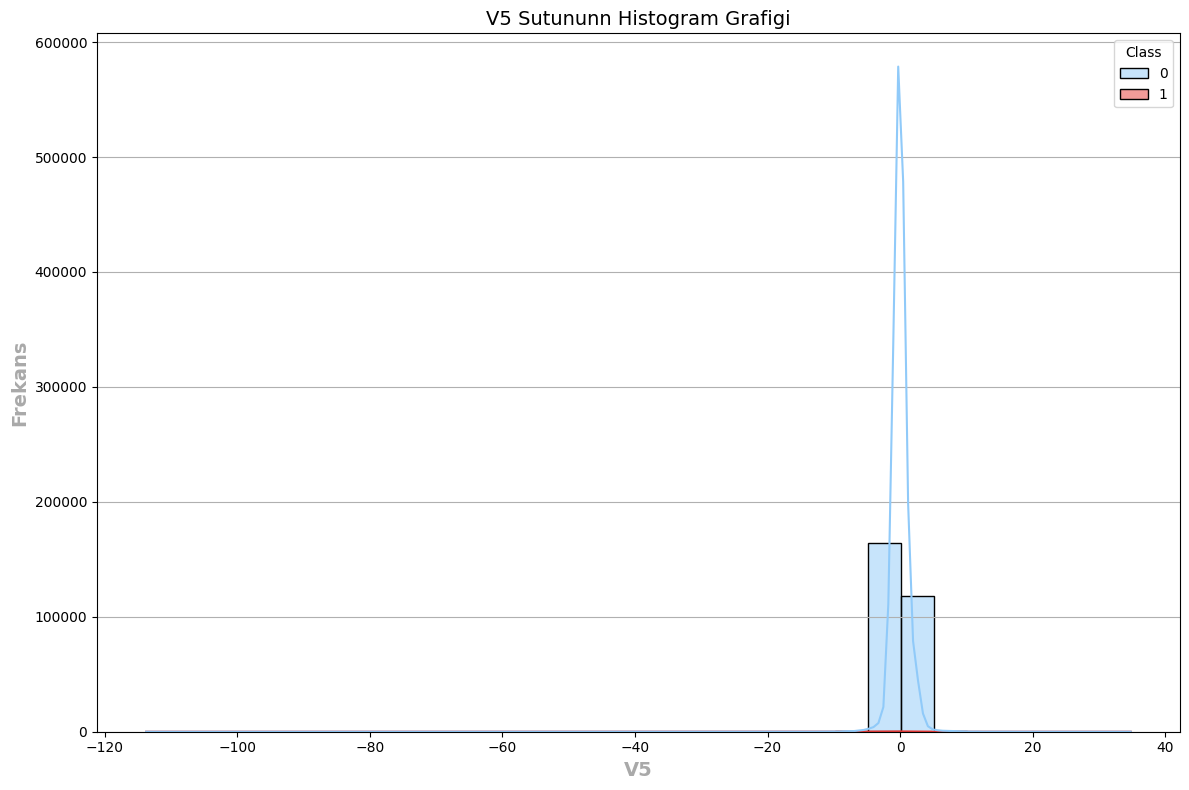

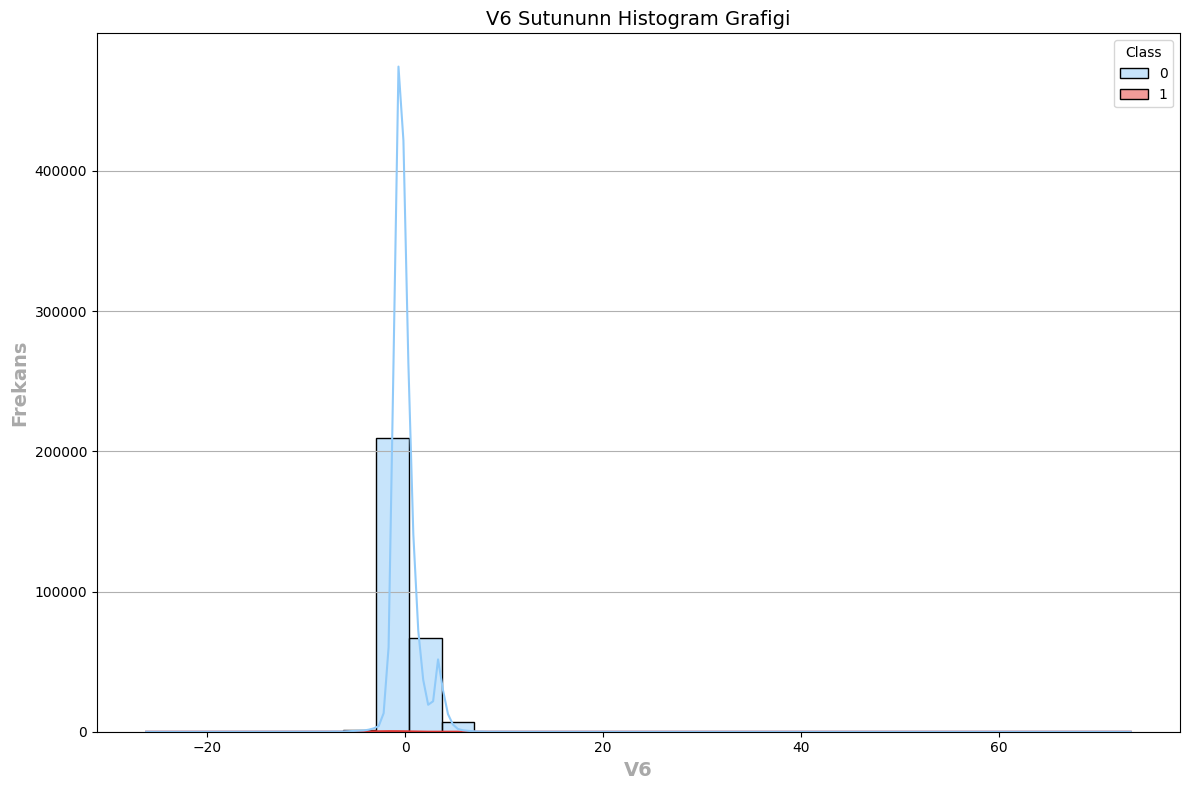

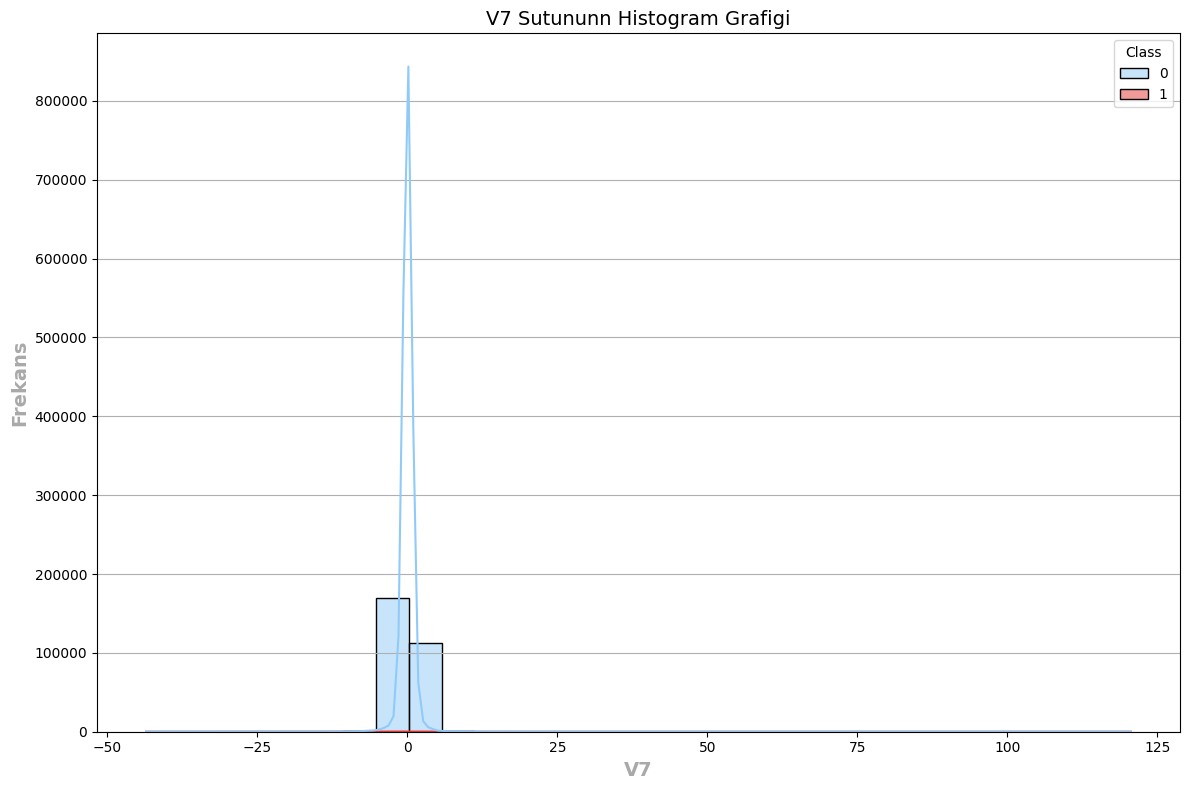

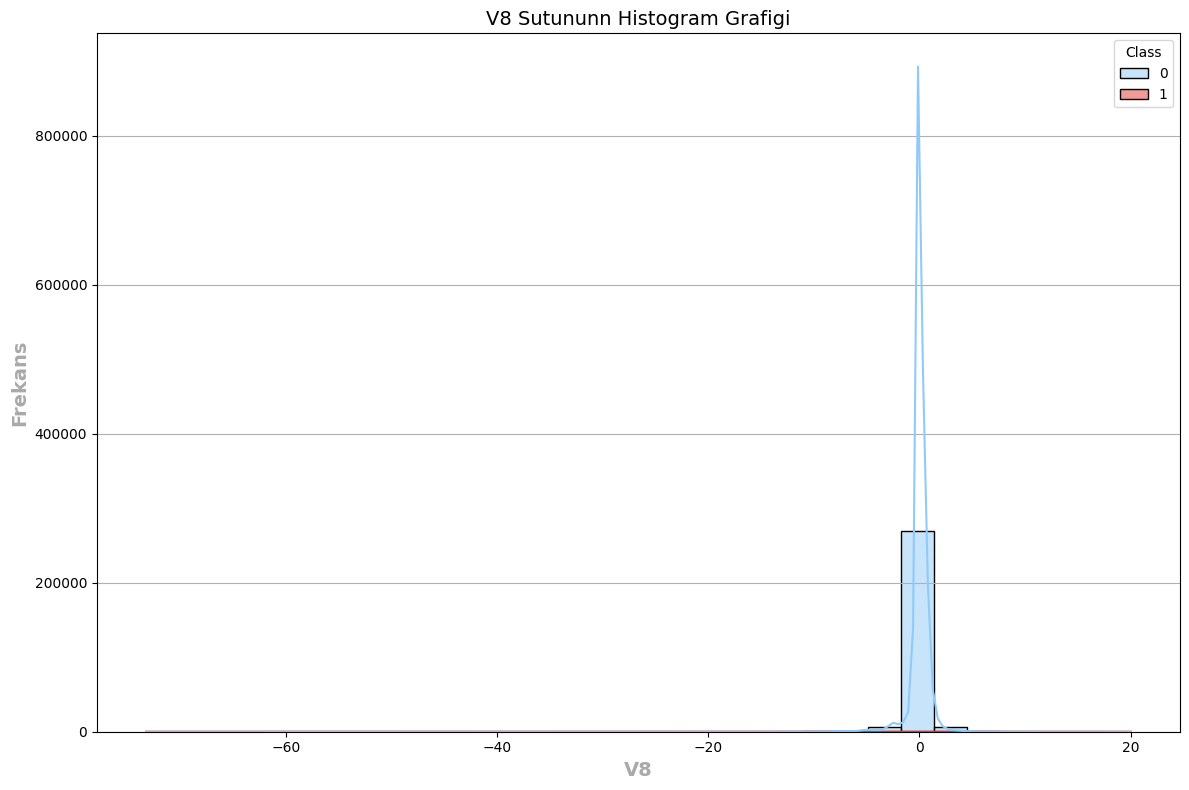

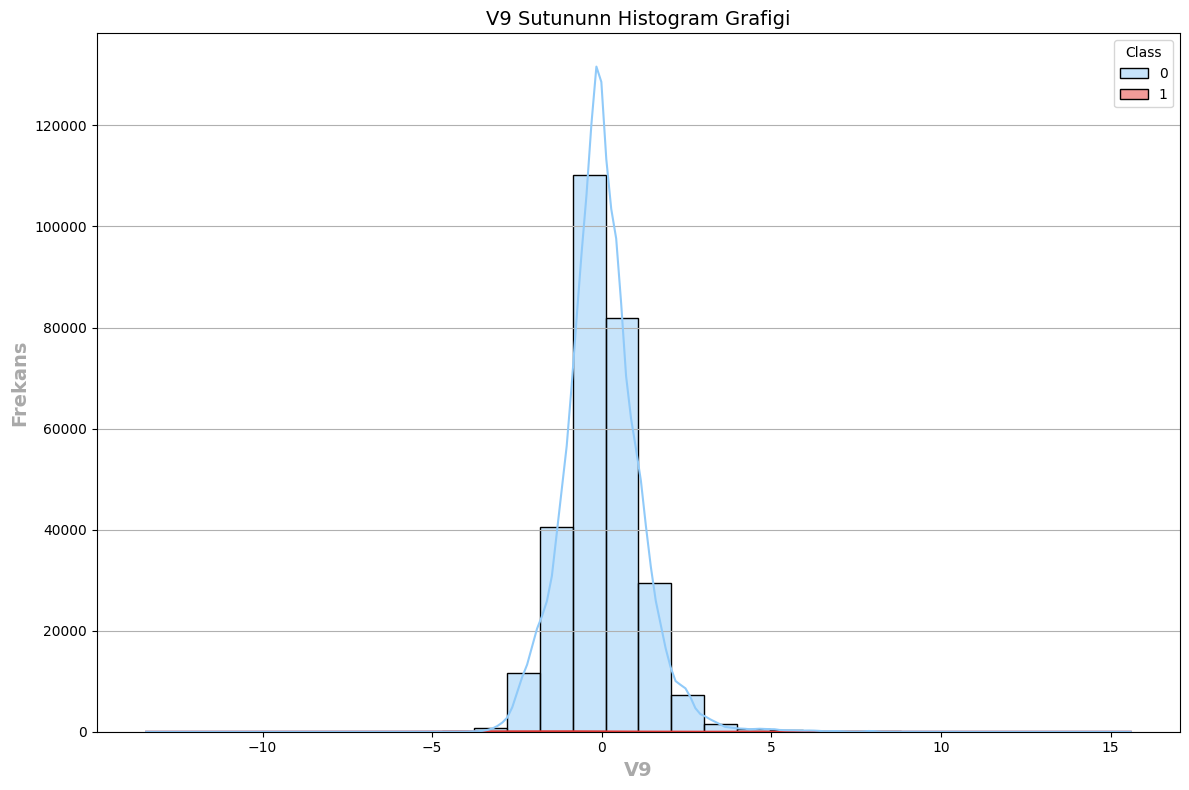

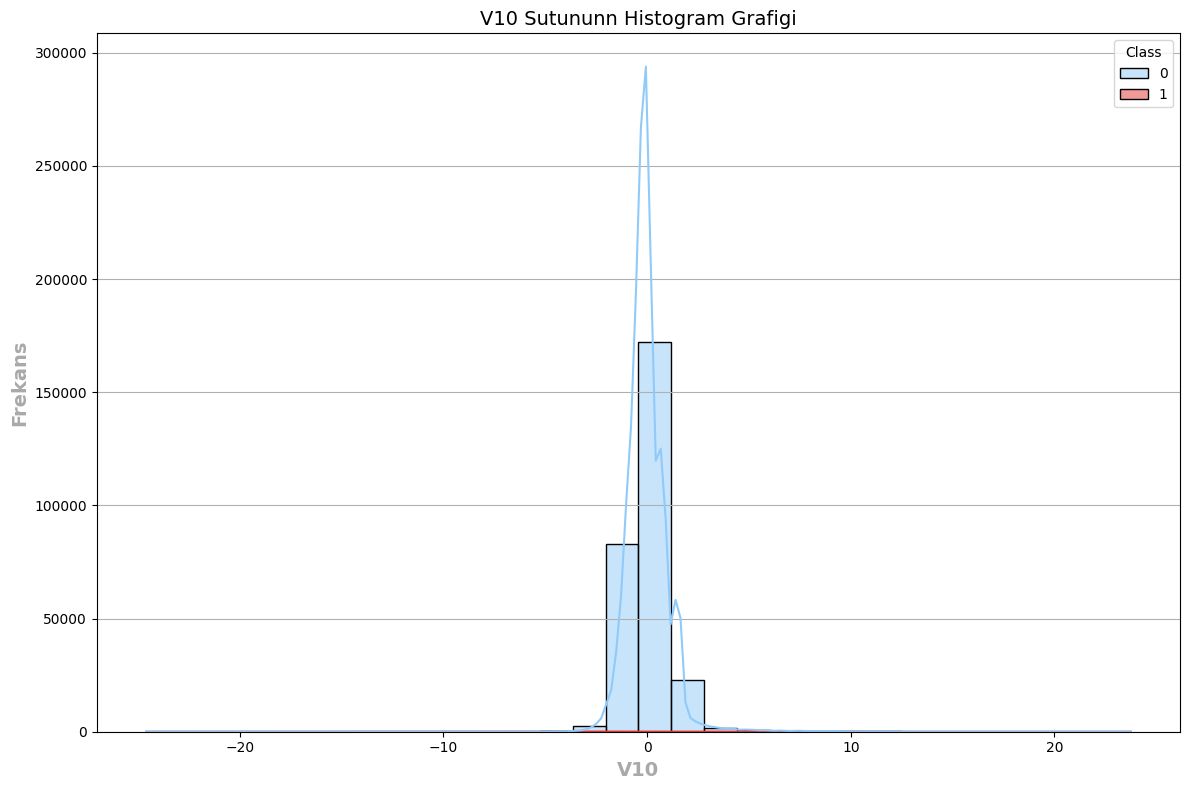

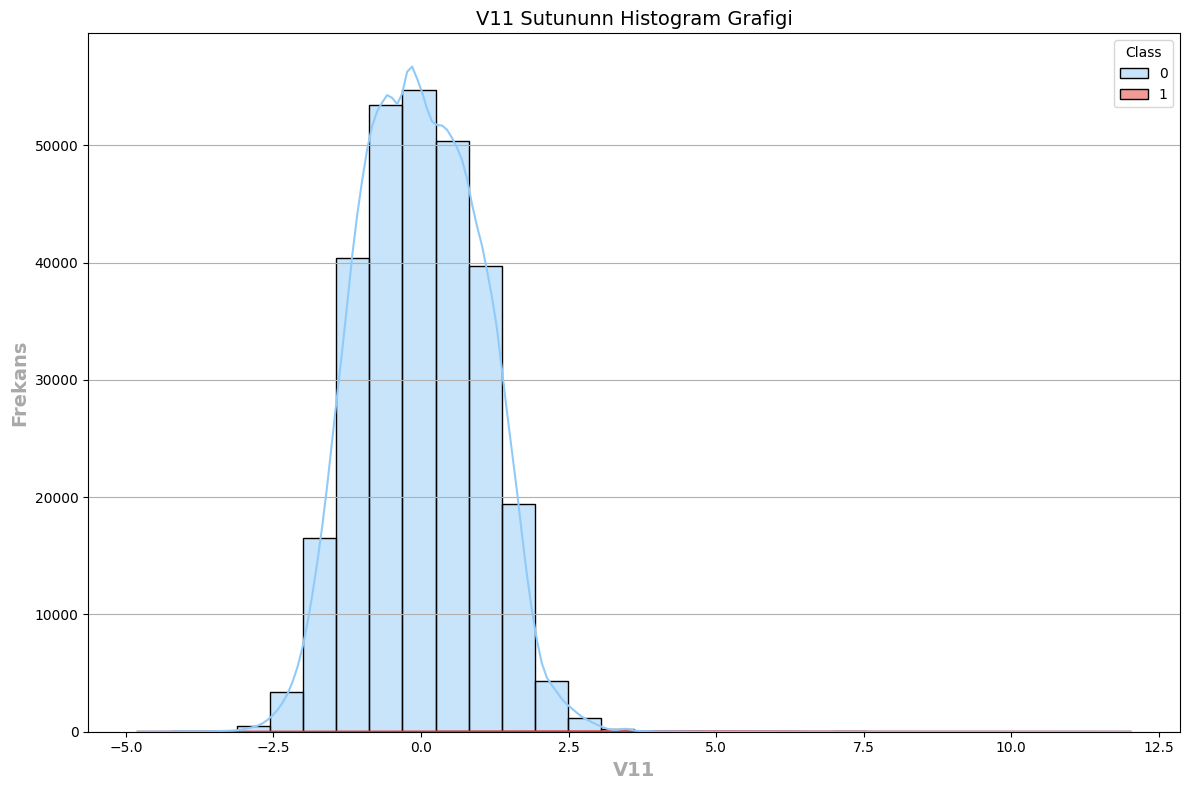

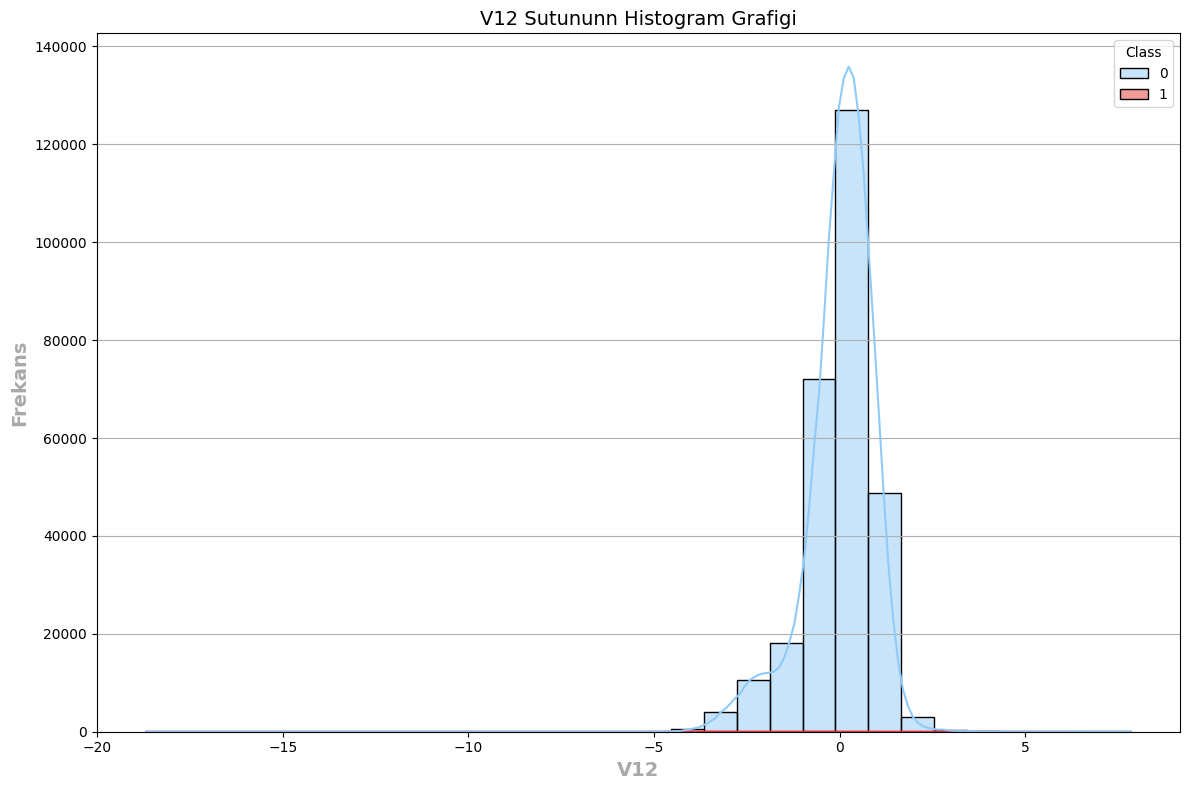

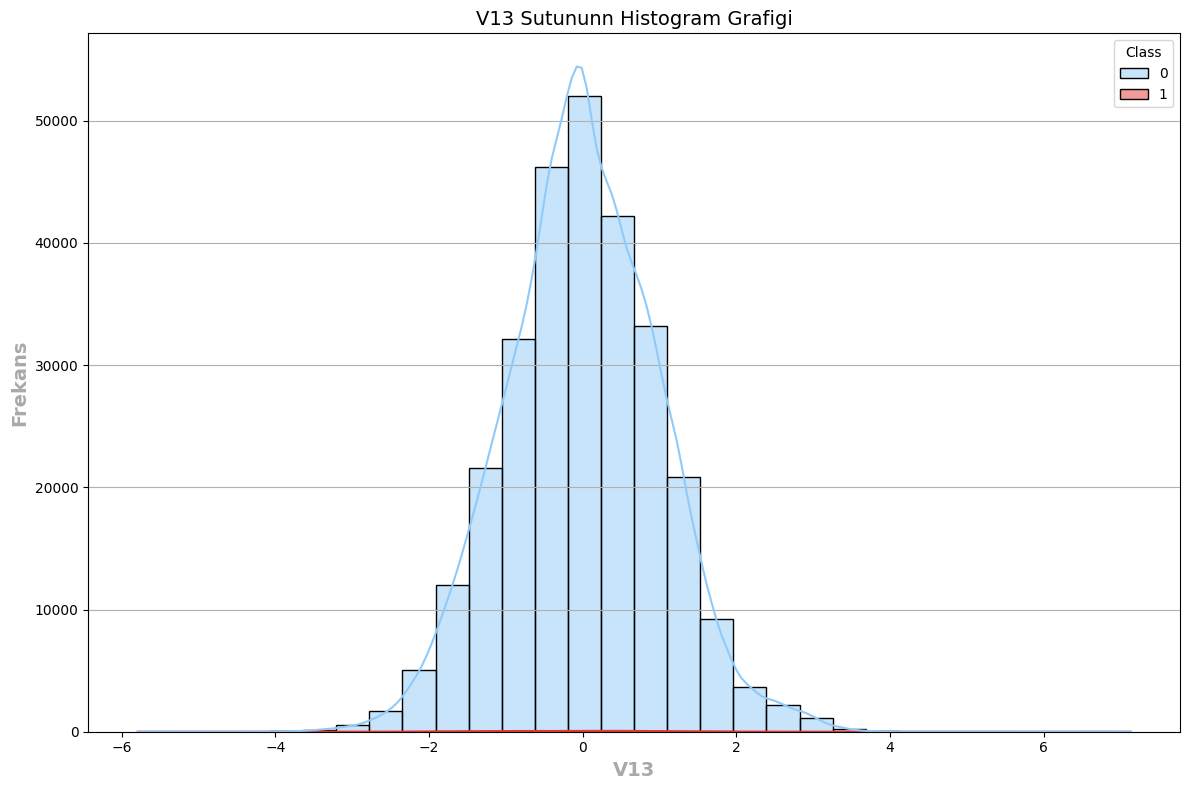

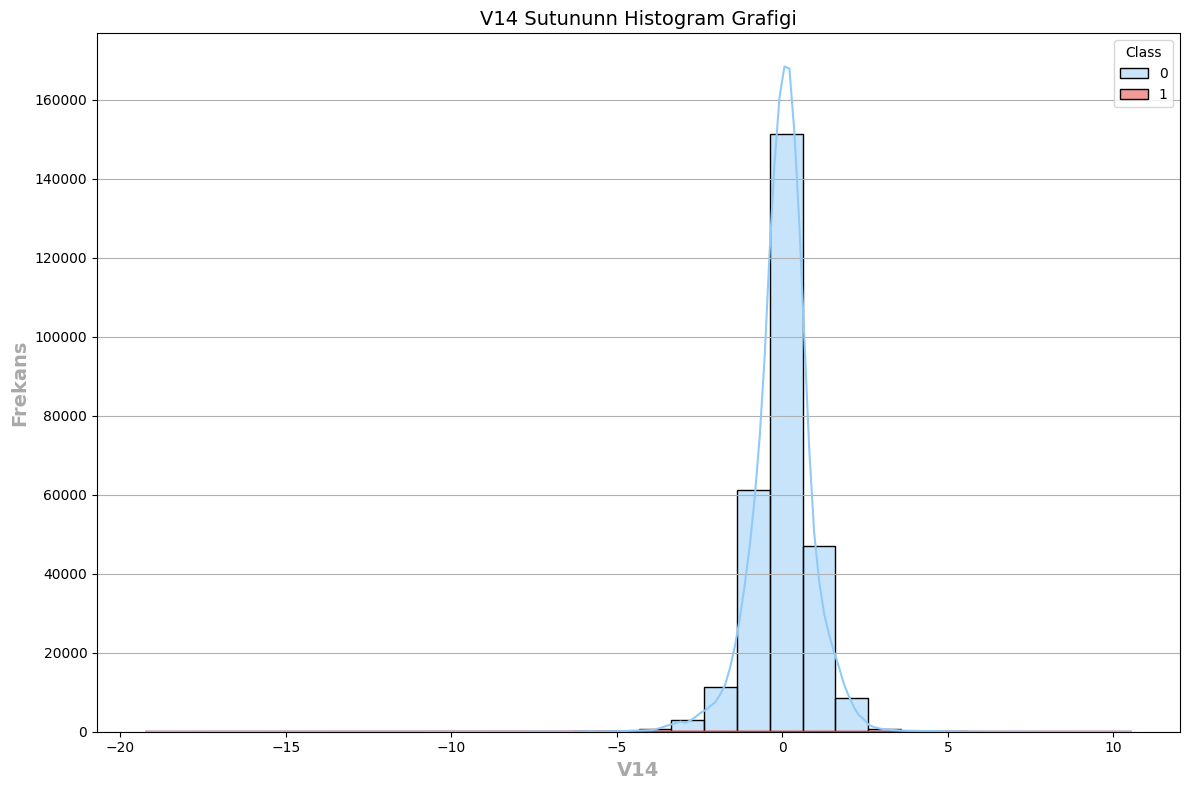

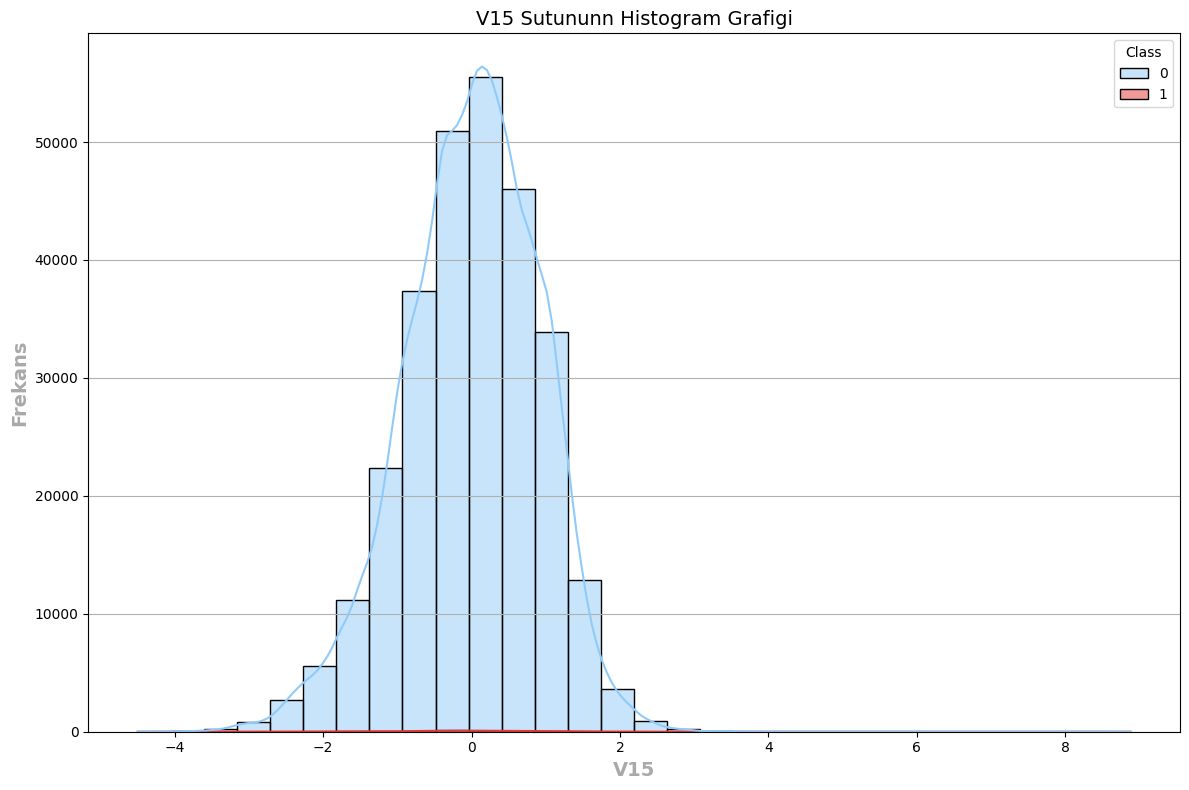

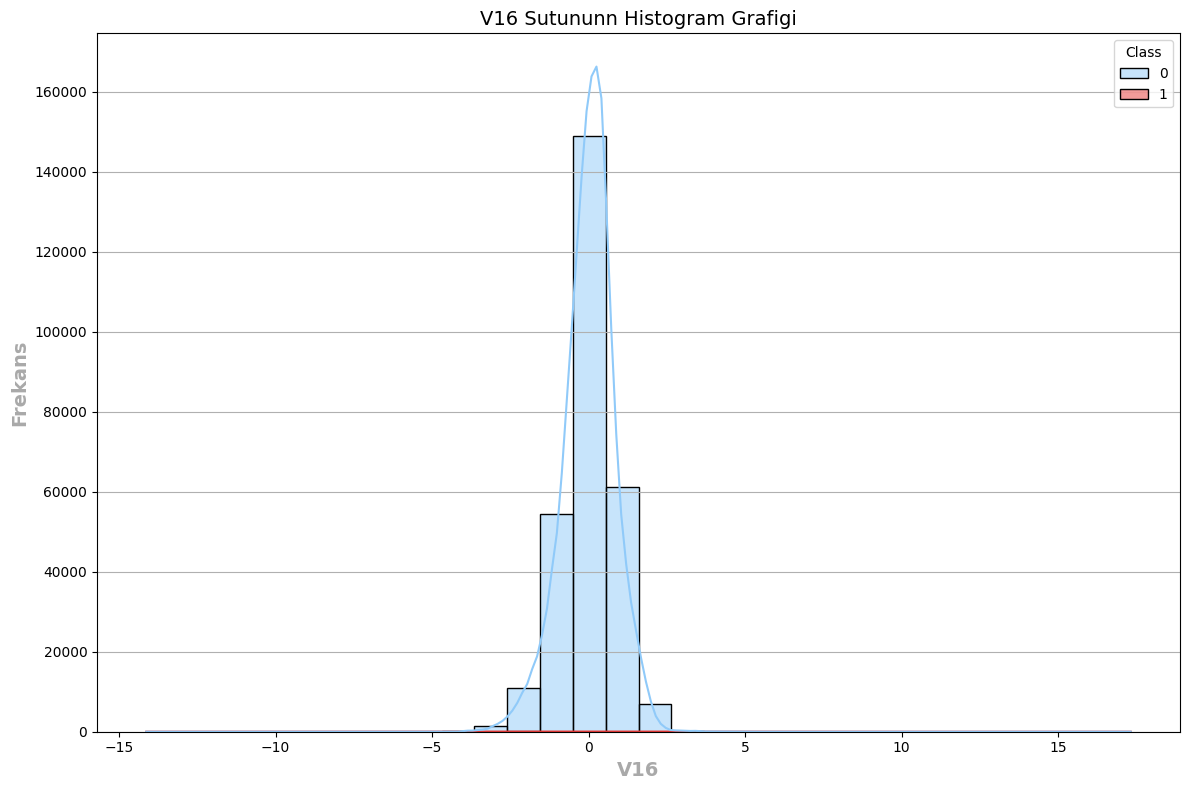

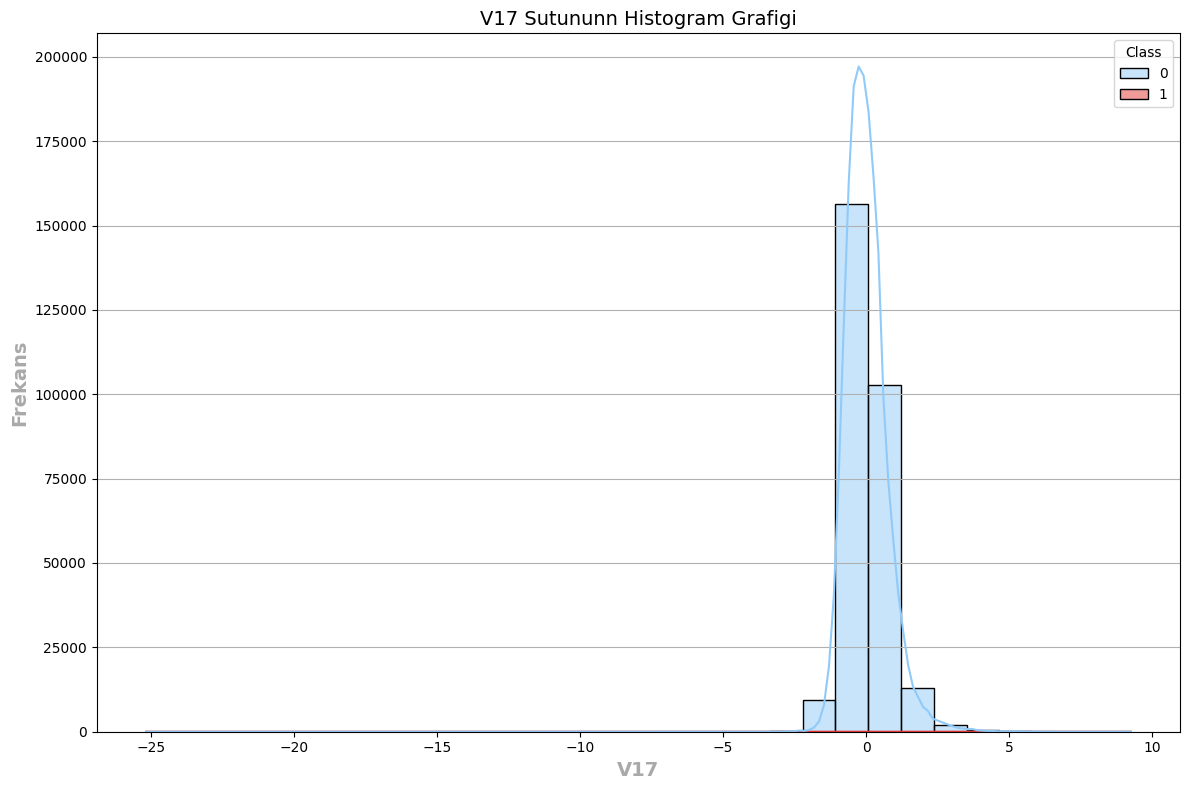

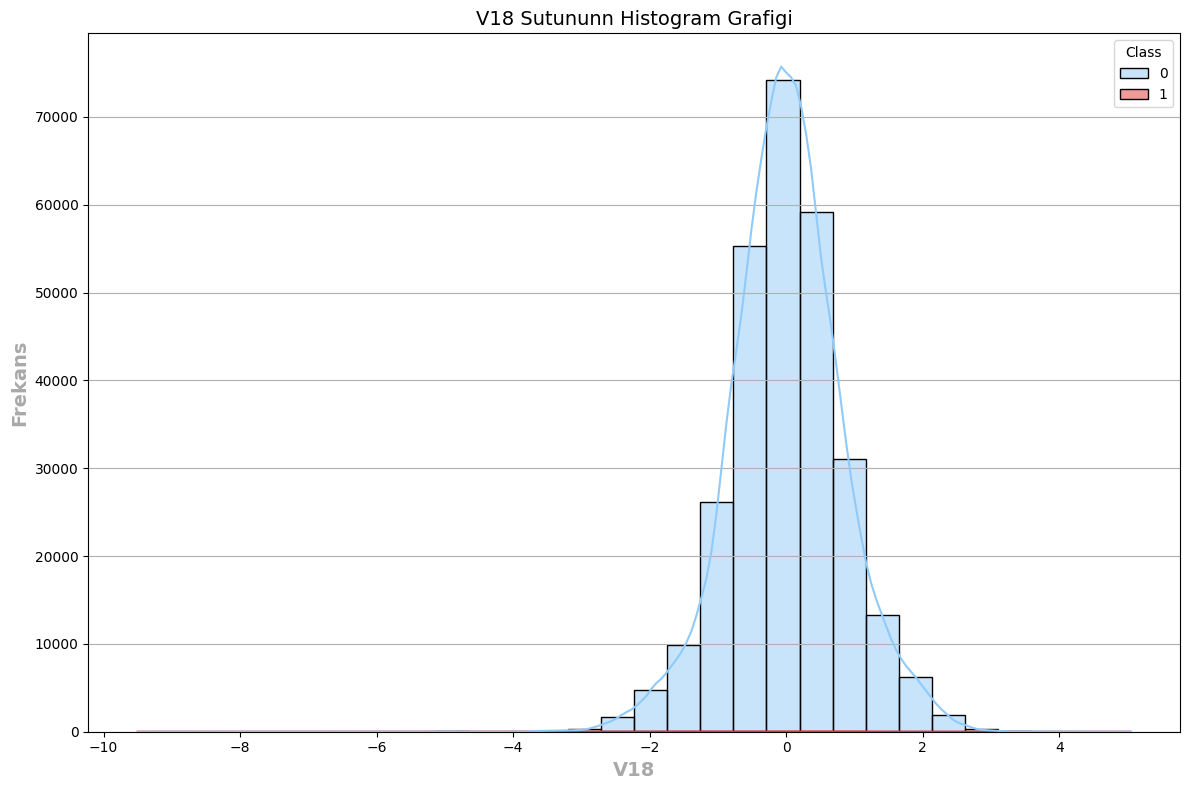

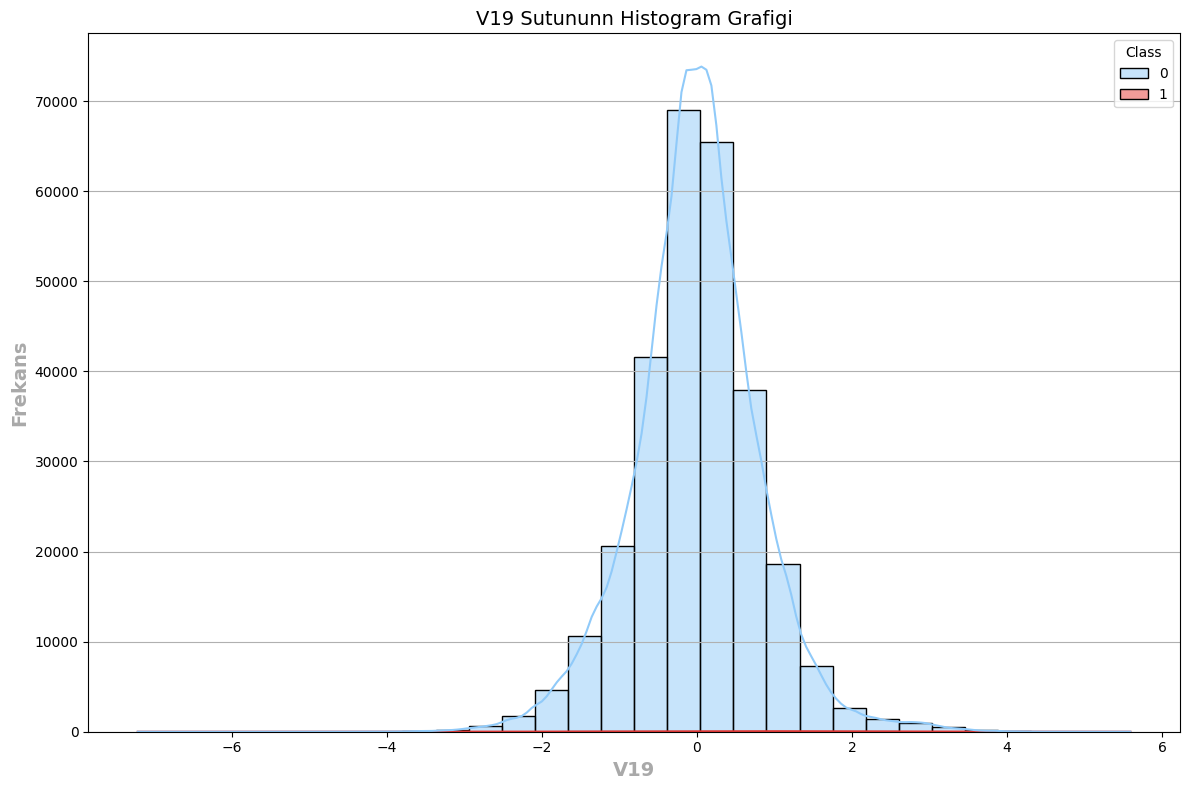

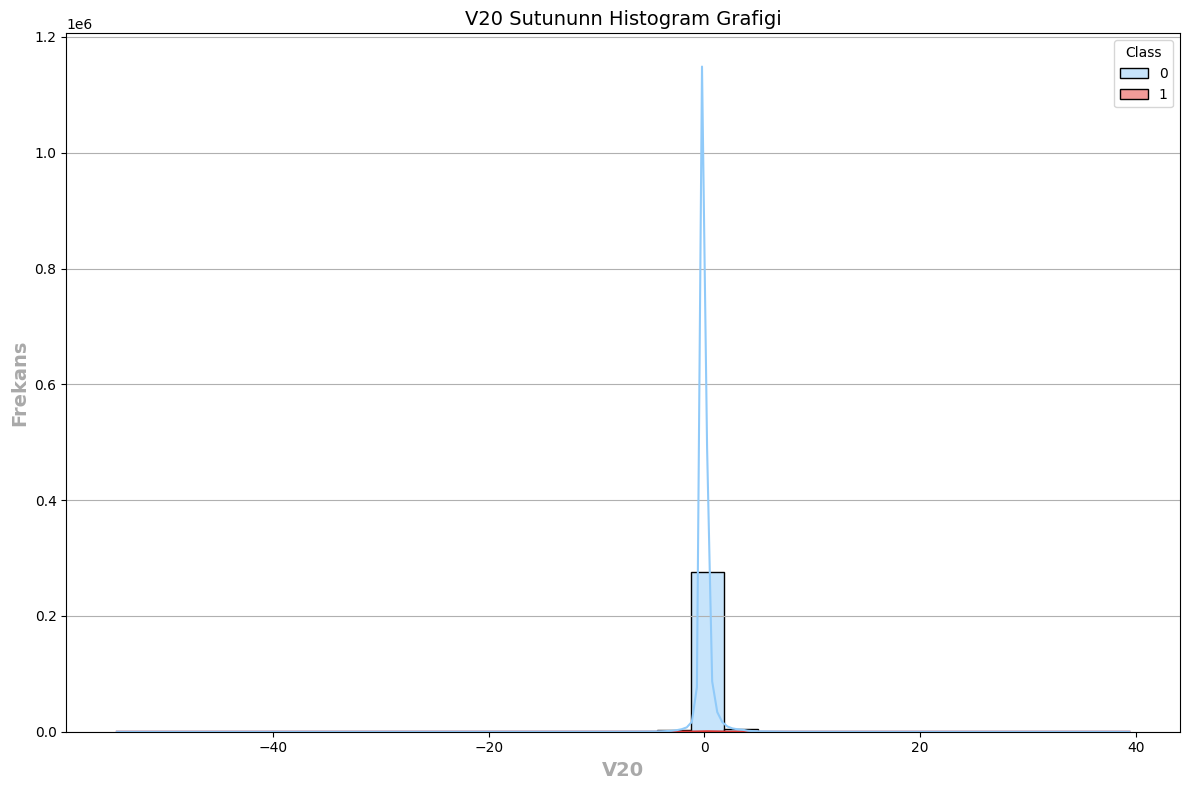

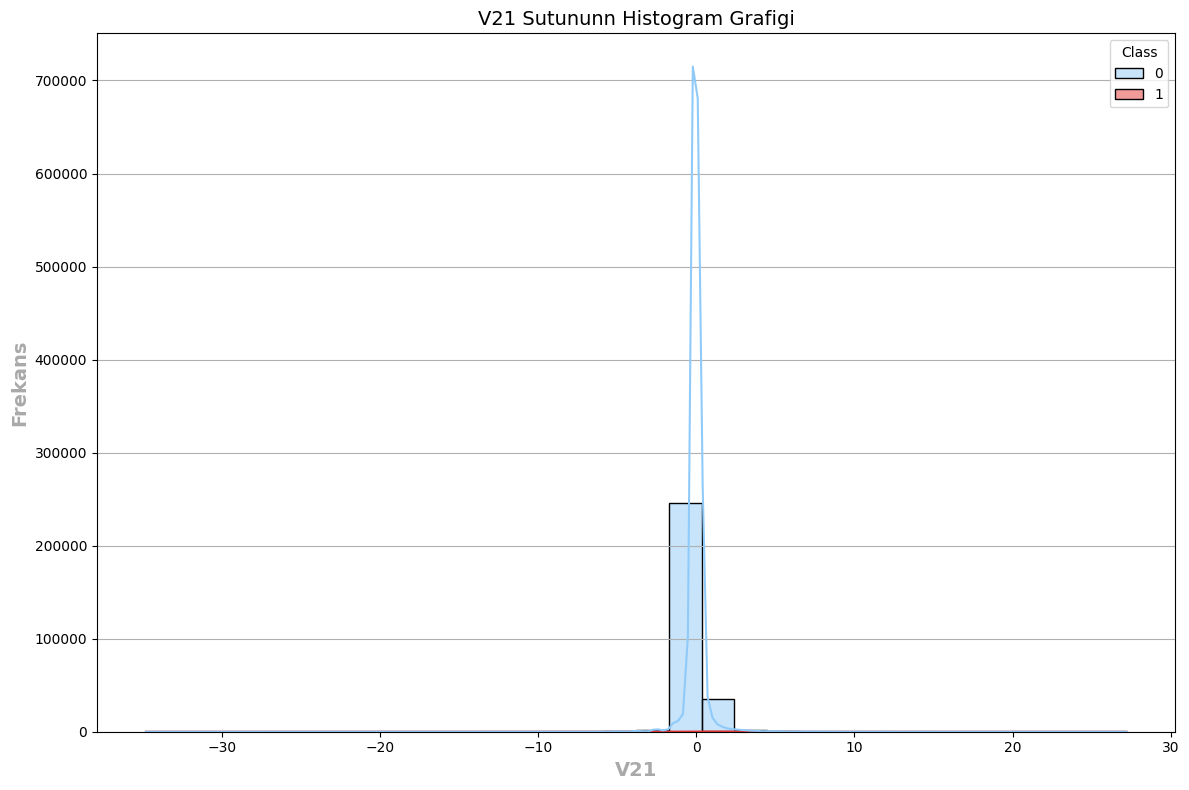

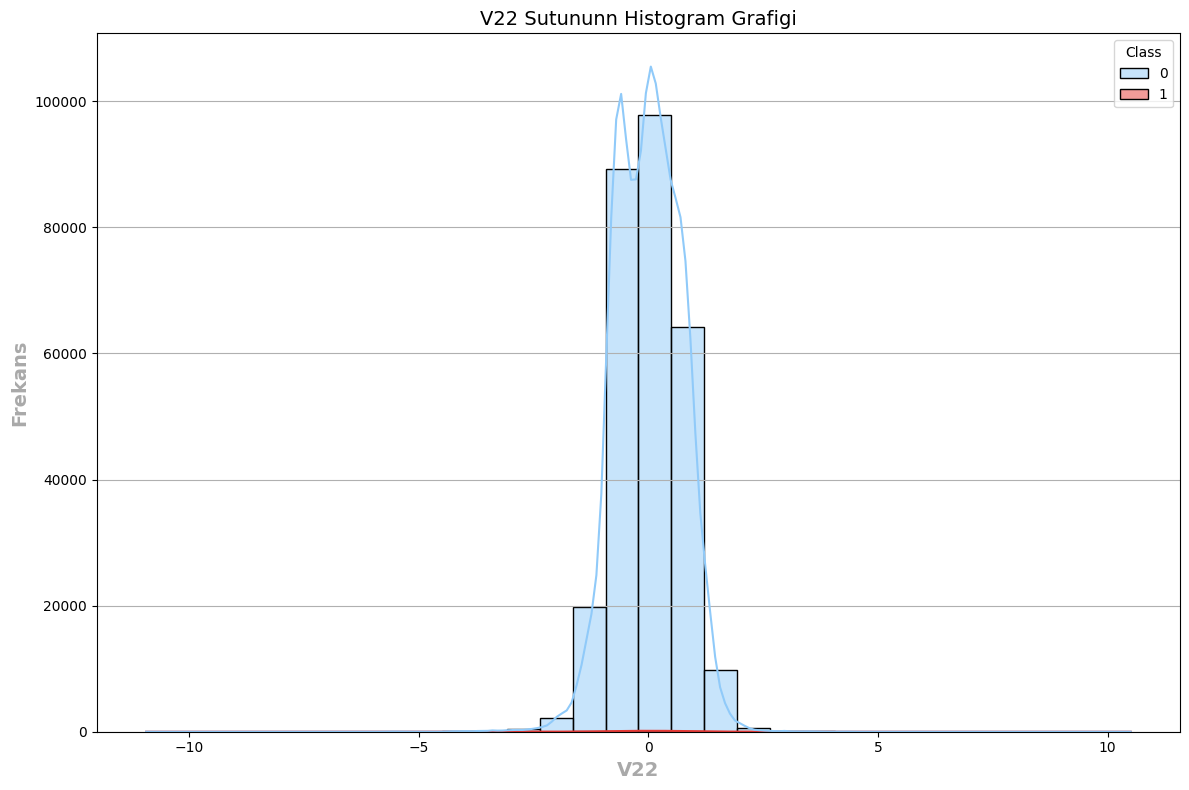

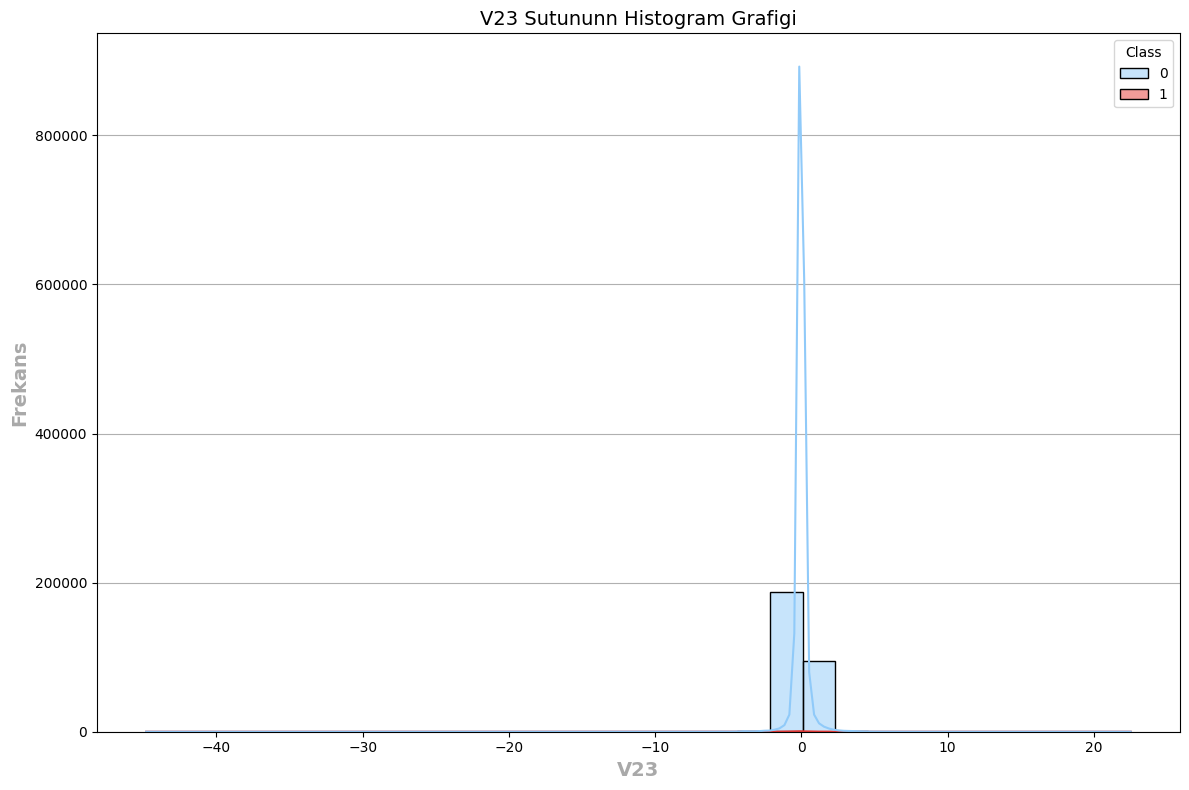

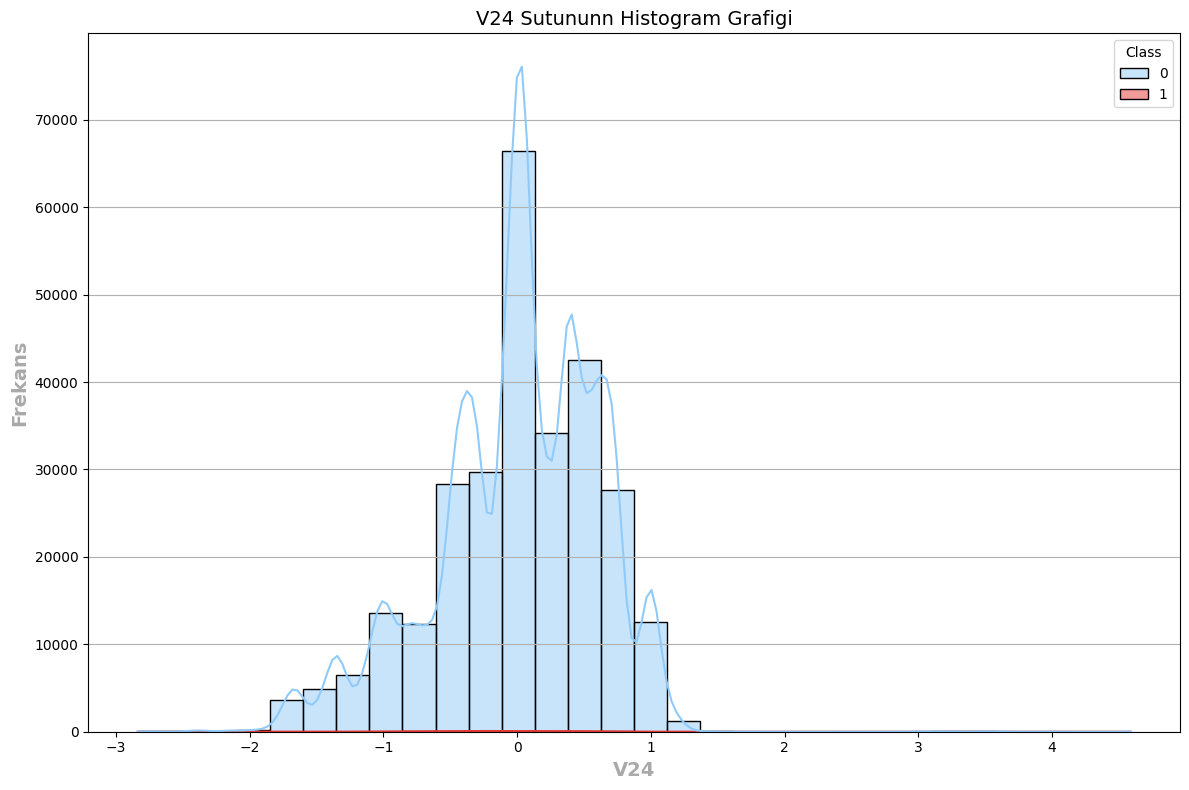

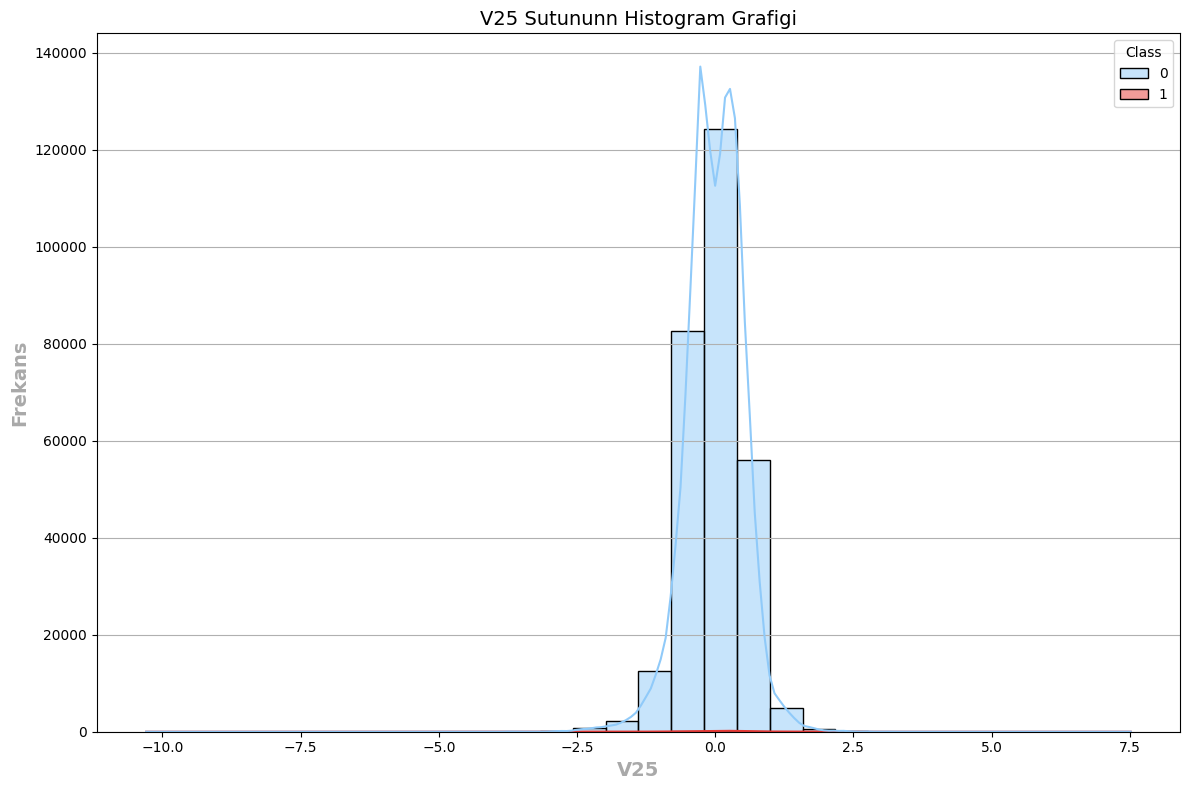

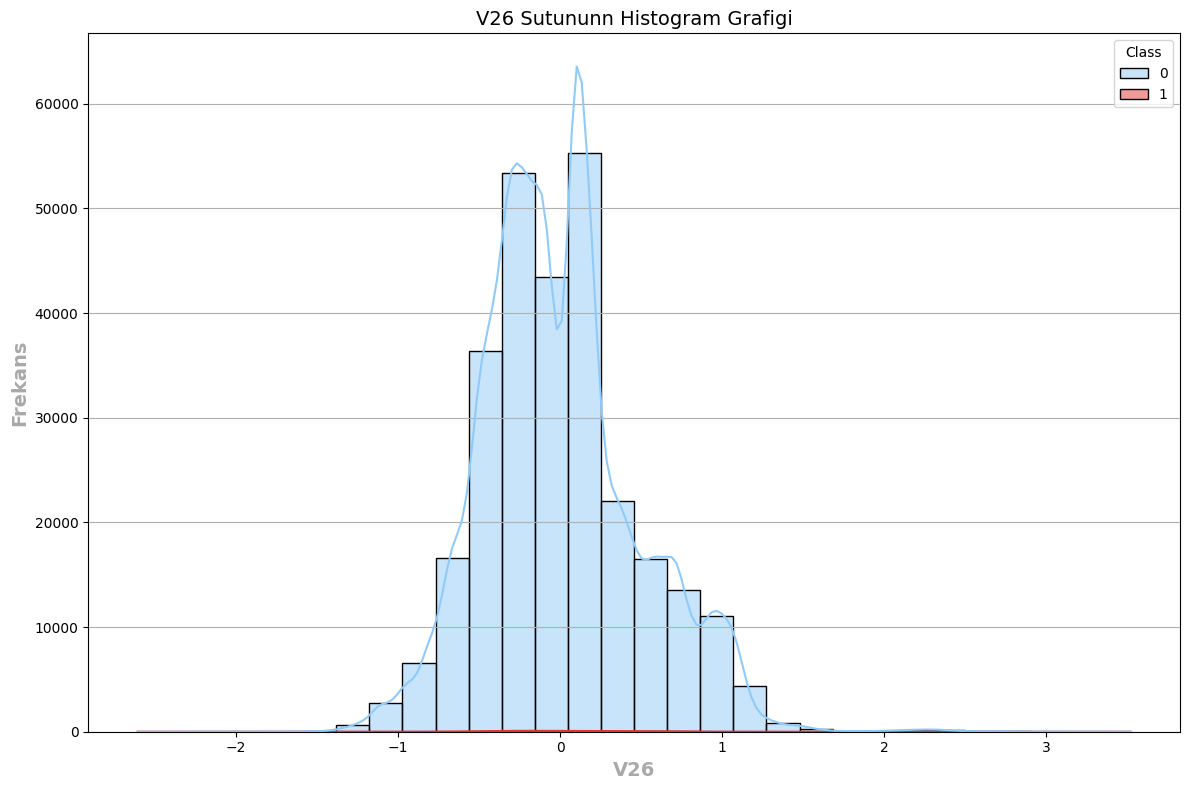

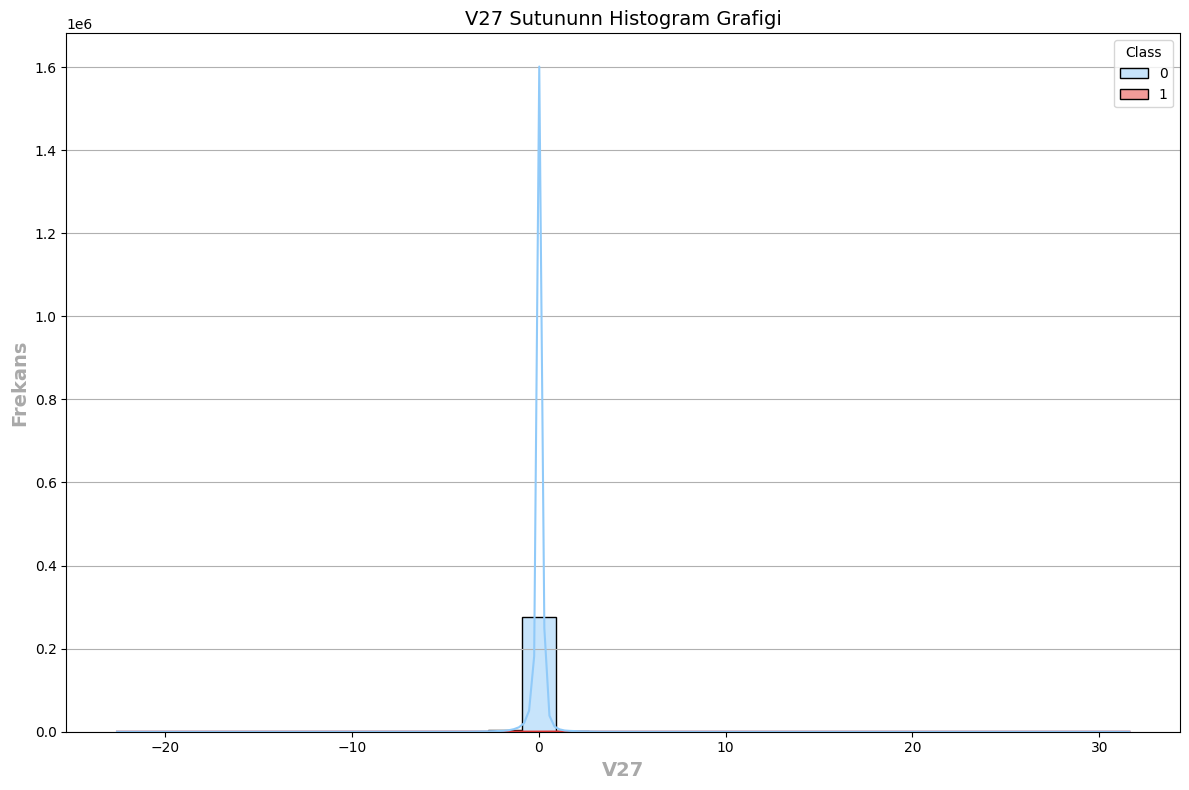

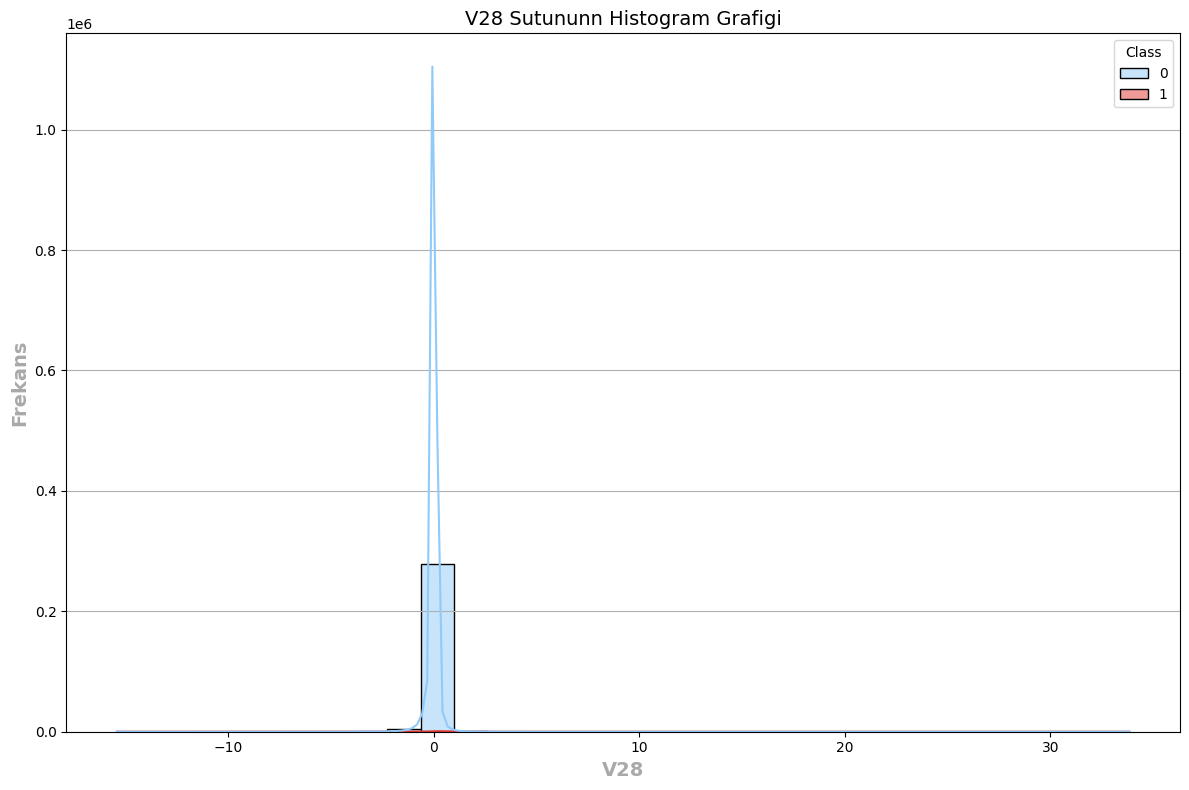

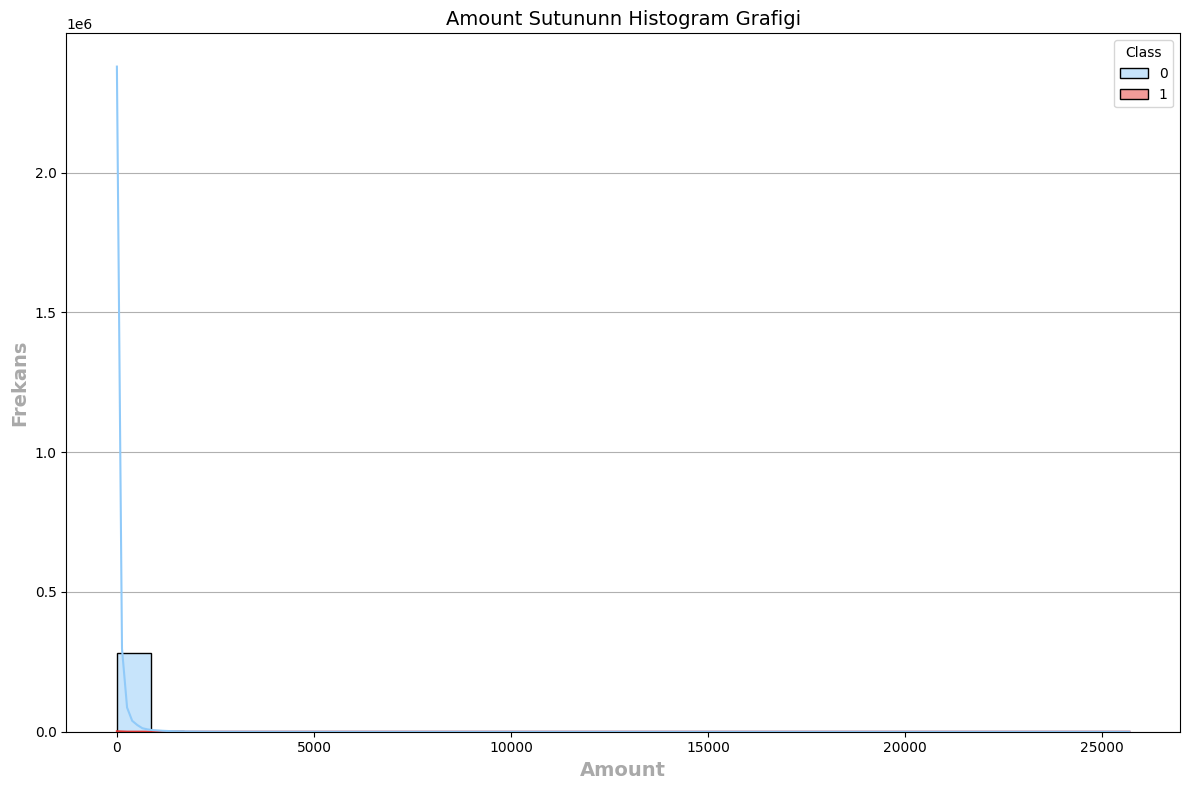

In [58]:
show_num_cols(fraud_df, num_cols = num_cols, plot = True)

### 8. Detect Outliers (Aykiri Deger Tespiti)

In [ ]:
def check_outlier(dataframe, num_cols,  q1 = 0.25, q3 = 0.75, plot = False):
    df = dataframe.copy()
    outlier_dict = {}
    for col in num_cols:
        if col not in df.columns:
            continue
            
        Q1 = df[col].quantile(q1)
        Q3 = df[col].quantile(q3)
        IQR = Q3 - Q1 
        upper_bound = Q3 + 1.5 * IQR 
        lower_bound = Q1 - 1.5 * IQR 
            
        outliers = df[(df[col] < lower_bound)  | (df[col] > upper_bound)]
        outlier_index = outliers.index
        outliers_len = len(outliers)
            
        outlier_dict[col] = {
            "Q1":Q1,
            "Q3":Q3,
            "IQR": IQR,
            "Lower Bound":lower_bound,
            "Upper Bound": upper_bound,
            "Length of Outlier": outliers_len,
            "Outlier Index": list(outlier_index)
                
        }
        if plot:
            plt.figure(figsize = (12, 8))
            sns.boxplot(data = df, x = col, color = "mediumpurple")
            plt.title(f"{col} Sutunun Kutu Grafigi")
            plt.xlabel(f"{col}")
            plt.ylabel("Degerler")
            plt.tight_layout()
            plt.show()

    return outlier_dict

check_outlier(fraud_df, num_cols)